## Random Forest Classifiers
<ins>R</ins>andom <ins>F</ins>orest <ins>C</ins>lassifiers use an ensemble method meaning models are created by combining the result of many individual decision tree models. Decision trees classify a set of features by combining (many) layers of sub-classifications. RFCs train small decision trees, that is ones with only a few layers, and use the most popular result of all the trees to classify the set of features. 

RFCs can produce powerful models and are particulary good at working with categorical. They do not scale well with large amounts of data. Another disadvantage is they can train to favor some features more than others. In  many situations RFC models perform as good or better than other types of models. 

## Using RFC on the Credit Card Churn Data
The credit card data includes both demographic and 

## Setup
The mechlearn file was writen to easily compute the accuracy score and 'area under the curve' for a given model. The 'auct' function splits and scales the proved data sets, creates a model with them, generates an receiver/operater curve and returns the false positive and true posititves rates as well the area under the curve. The 'acct' fuinction splits and scales the proved data sets, creates a model with them and scores the accuracy of the model on the testing set.

In [1]:
# import dependencies
import pandas as pd
from mechlearn import split_and_scale as ss
from mechlearn import auc_test as auct
from mechlearn import acc_test as acct
from mechlearn import feature_importances as fi
from matplotlib import pyplot as plt
import numpy as np

The 'Resources/X.csv' and 'Resources/y.csv' files were generated in the etl_workflow.ipynb and hold the cleaned data and target values for the entire dataset.

In [2]:
# load data (X) and target (y) into dataframes
X = pd.read_csv('../Resources/X.csv')
y = pd.read_csv('../Resources/y.csv')

## Evaluate Model Using All Features

In [3]:
features = X.columns
print(f'Feature names: {features}')
print(f'Number of Features: {len(features)}')

Feature names: Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_F', 'Gender_M', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinu

In [4]:
print('Random forest classifiier on full data')
print(f'Accuracy: {acct(X, y, model="rfc")}')
print(f'Area under curve: {auct(X, y, model="rfc")}')

Random forest classifiier on full data
Accuracy: 0.957345971563981
Area under curve: 0.987766492556


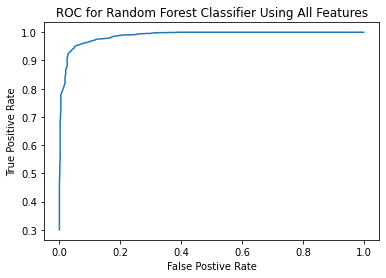

In [5]:
plot = pd.read_csv('../Outputs/RandomForestClassifier_ROC.csv')
plt.plot(plot['fpr'], plot['tpr'])
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Random Forest Classifier Using All Features')
plt.show()

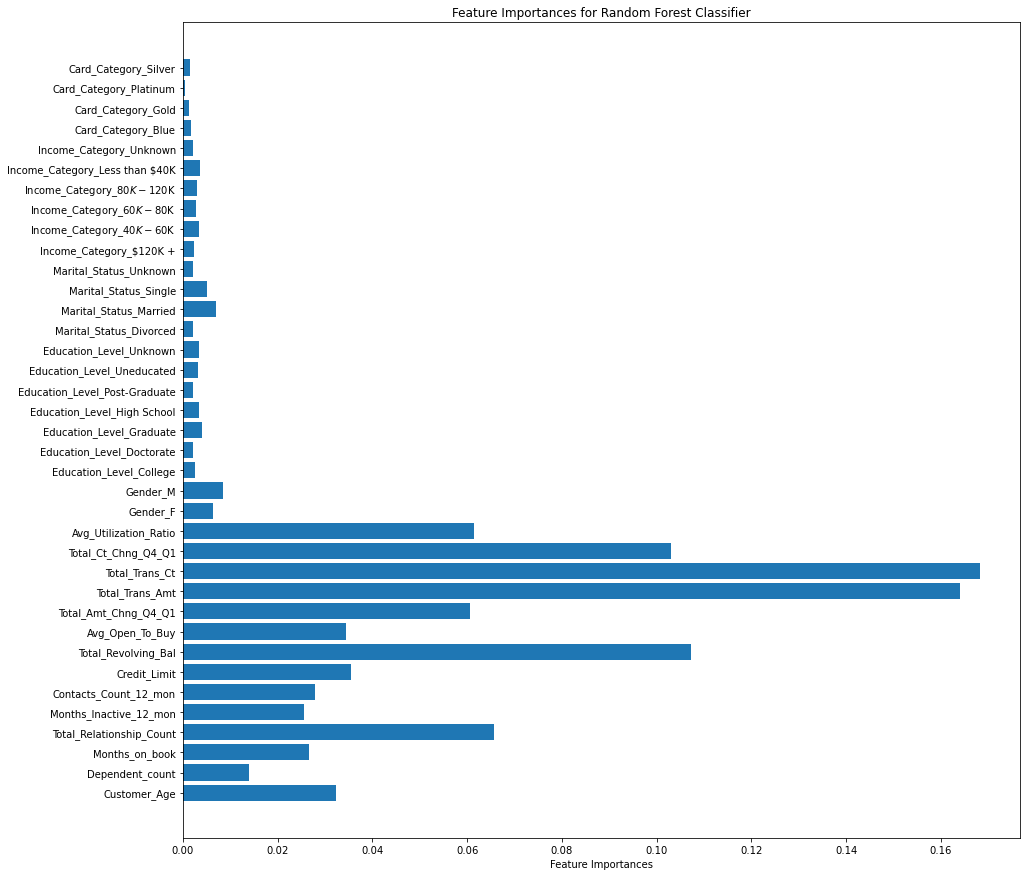

In [6]:
feature_importances = fi(X, y, model='rfc')
ticks = np.arange(len(X.columns))
fig, ax = plt.subplots()
ax.barh(ticks, feature_importances)
ax.set_yticks(ticks, labels=X.columns)
fig.set_size_inches(15, 15)
ax.set_xlabel('Feature Importances')
ax.set_title('Feature Importances for Random Forest Classifier')
plt.show()
pd.DataFrame({'Features': features, 'Feature_Importances': feature_importances}).to_csv('../Outputs/RandomForestClassifier_FI.csv')

## Evaluate Model with Just Demographics Data

In [7]:
Xdem = pd.read_csv('../Resources/X-dem.csv')

In [8]:
features_dem = Xdem.columns.values
print(f'Feature names: {features_dem}')
print(f'Number of Features: {len(features_dem)}')

Feature names: ['Customer_Age' 'Dependent_count' 'Gender_F' 'Gender_M'
 'Education_Level_College' 'Education_Level_Doctorate'
 'Education_Level_Graduate' 'Education_Level_High School'
 'Education_Level_Post-Graduate' 'Education_Level_Uneducated'
 'Education_Level_Unknown' 'Marital_Status_Divorced'
 'Marital_Status_Married' 'Marital_Status_Single' 'Marital_Status_Unknown'
 'Income_Category_$120K +' 'Income_Category_$40K - $60K'
 'Income_Category_$60K - $80K' 'Income_Category_$80K - $120K'
 'Income_Category_Less than $40K' 'Income_Category_Unknown']
Number of Features: 21


In [9]:
print('Random forest classifiier on demographic data only')
print(f'Accuracy: {acct(Xdem, y, model="rfc")}')
print(f'Area under curve: {auct(Xdem, y, model="rfc", data_set="X-dem")}')

Random forest classifiier on demographic data only
Accuracy: 0.7788309636650869
Area under curve: 0.5268353174603174


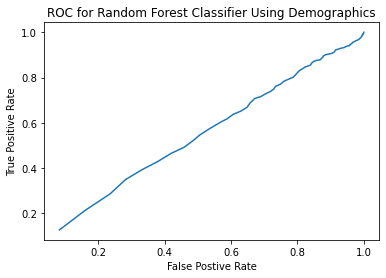

In [10]:
plot_dem = pd.read_csv('../Outputs/X-dem_RandomForestClassifier_ROC.csv')
plt.plot(plot_dem['fpr'], plot_dem['tpr'])
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Random Forest Classifier Using Demographics')
plt.show()

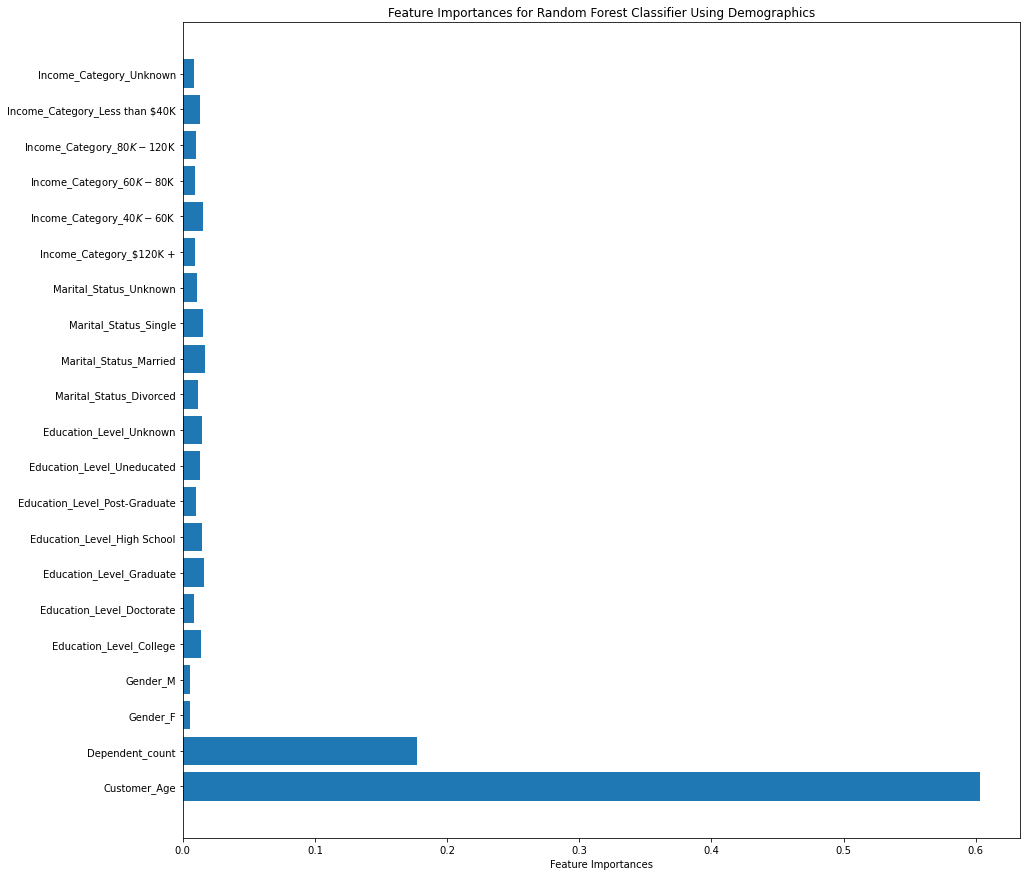

In [11]:
feature_importances_dem = fi(Xdem, y, model='rfc')
ticks = np.arange(len(features_dem))
fig, ax = plt.subplots()
ax.barh(ticks, feature_importances_dem)
ax.set_yticks(ticks, labels=features_dem)
fig.set_size_inches(15, 15)
ax.set_xlabel('Feature Importances')
ax.set_title('Feature Importances for Random Forest Classifier Using Demographics')
plt.show()
pd.DataFrame({'Features': features_dem, 'Feature_Importances': feature_importances_dem}).to_csv('../Outputs/X-dem_RandomForestClassifier_FI.csv')

## Evaluate Model with PCA

In [12]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier as RFC
from mechlearn import roc

_Xs, Xs_, _ypca, ypca_ = ss(X, y)
pca = PCA(n_components=21)
_Xspca, Xspca_ = pca.fit_transform(_Xs), pca.transform(Xs_)
print(f'Variance ratio of components: {[round(variance,2) for variance in pca.explained_variance_ratio_]}')
print(f'Number of components: 21')

Variance ratio of components: [0.12, 0.07, 0.05, 0.05, 0.05, 0.04, 0.04, 0.04, 0.04, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]
Number of components: 21


In [13]:
rfc_pca = RFC()
rfc_pca.fit(_Xspca, _ypca.to_numpy().ravel())
score = rfc_pca.score(Xspca_, ypca_)
auc = roc(Xspca_, ypca_, rfc_pca, 100, area=True, save_path='../Outputs/X-pca_RandomForestClassifier_ROC.csv')
print('Random forest classifiier with PCA')
print(f'Accuracy: {score}')
print(f'Area under curve: {auc}')

Random forest classifiier with PCA
Accuracy: 0.891390205371248
Area under curve: 0.8704588503011541


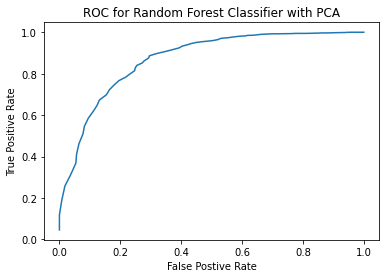

In [14]:
plot_pca = pd.read_csv('../Outputs/X-pca_RandomForestClassifier_ROC.csv')
plt.plot(plot_pca['fpr'], plot_pca['tpr'])
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Random Forest Classifier with PCA')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler as SS
rfc_dem = RFC()
_Xdem, Xdem_, _y, y_ = tts(Xdem, y)
ss = SS()
_Xsdem, Xsdem_ = ss.fit_transform(_Xdem), ss.transform(Xdem_)
rfc_dem.fit(_Xsdem, _y.to_numpy().ravel())
rfc_dem_val = pd.DataFrame(Xdem_, columns=features_dem)
rfc_dem_val['target'] = y_
rfc_dem_val['prediction'] = rfc_dem.predict_proba(Xsdem_)[:,1]

,Customer_Age,Dependent_count,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,target,prediction
2710,56,2,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1.000000
686,53,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0.555131
4764,45,4,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,1.000000
4587,45,4,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0.973333
3691,43,4,0,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0.775560


In [35]:
rfc_age = rfc_dem_val.groupby('Customer_Age').mean()
rfc_age['count'] = rfc_dem_val.groupby('Customer_Age').count()['target']
rfc_age['target_variance'] = rfc_dem_val.groupby('Customer_Age').std()['target']
rfc_age['prediction_variance'] = rfc_dem_val.groupby('Customer_Age').std()['prediction']

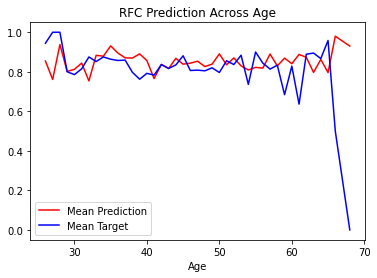

In [20]:
import math
plt.plot(rfc_age.index, rfc_age['prediction'], c='red', label='Mean Prediction')
# plt.fill_between(rfc_age.index, rfc_age['prediction']+rfc_age['prediction_variance'], y2=rfc_age['prediction']-rfc_age['prediction_variance'], color='red', alpha=.1)
plt.plot(rfc_age.index, rfc_age['target'], c='blue', label='Mean Target')
# plt.fill_between(rfc_age.index, rfc_age['target']+rfc_age['target_variance'], y2=rfc_age['target']-rfc_age['target_variance'], color='blue', alpha=.1)
# plt.plot(rfc_age.index, rfc_age['count'].apply(lambda x: x/math.sqrt(39*2532)))
plt.legend()
plt.title('RFC Prediction Across Age')
plt.xlabel('Age')
plt.savefig('../Outputs/RFC-age-prediction.png')
plt.show()

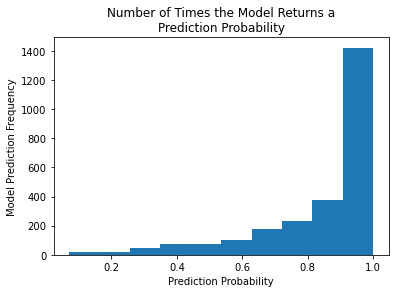

In [34]:
plt.hist(rfc_dem_val['prediction'])
plt.xlabel('Prediction Probability')
plt.ylabel('Model Prediction Frequency')
plt.title('Number of Times the Model Returns a\nPrediction Probability')
plt.savefig('../Outputs/RFC-prediction-distribution.png')
plt.show()

In [36]:
rfc_dem_val.loc[rfc_dem_val['prediction']<0.5,:]

,Customer_Age,Dependent_count,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,target,prediction
9643,54,2,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0.289167
2033,32,3,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0.220000
8462,44,5,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0.390000
8370,47,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0.365286
1687,26,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0.396667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,48,3,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0.350000
2798,49,2,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0.265976
8060,51,1,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0.380000
490,48,3,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0.376667
